In [1]:
#Importing required modules
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

import statsmodels.api as sm

In [2]:
#Importing data

df = pd.read_csv('data/2022/cleaned_data.csv')
df.head()

,Sex,PhysicalHealthDays,MentalHealthDays,SleepHours,HadHeartAttack,HeightInMeters,WeightInKilograms,State_Alaska,State_Arizona,State_Arkansas,...,FluVaxLast12_Yes,PneumoVaxEver_No,PneumoVaxEver_Yes,"TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",HighRiskLastYear_Yes,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
0,0,0.0,0.0,8.0,0,1.70,80.74,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,0,0.0,0.0,6.0,0,1.60,68.04,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,2.0,3.0,5.0,0,1.57,63.50,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0.0,0.0,7.0,0,1.65,63.50,0,0,0,...,1,0,1,1,0,0,0,0,0,0
4,0,2.0,0.0,9.0,0,1.57,53.98,0,0,0,...,0,0,1,1,0,0,0,0,0,0


## Train/Test Split

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['HadHeartAttack'])
y = df['HadHeartAttack']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=2)

## Dealing with class imbalance by downsampling

From the preliminary EDA, there is a significant disparity between the number of people who reported having no heart attacks and the number of people who reported having a heart attack. This could potentially be a problem to some models as it could introduce some biases to the majority class (those who responded 'No')

In [4]:
from sklearn.utils import resample

print('Number of class 0 examples before:', X_train[y_train == 0].shape[0])

X_downsampled, y_downsampled = resample(X_train[y_train == 0],
                                        y_train[y_train == 0],
                                        replace=True,
                                        n_samples=X_train[y_train == 1].shape[0],
                                        random_state=123)

print('Number of class 0 examples after:', X_downsampled.shape[0])

# Combine upsample with original data
X_train_bal = np.vstack((X_train[y_train == 1], X_downsampled))
y_train_bal = np.hstack((y_train[y_train == 1], y_downsampled))

# Convert the X variable numpy array into a dataframe
X_train_bal = pd.DataFrame(X_train_bal, columns=X.columns)

Number of class 0 examples before: 105019
Number of class 0 examples after: 6224


## Using Logistic Regression Model

In [5]:
#Using stats models logistic regression implementation:

# adding the column of ones
X_withconstant = sm.add_constant(X_train_bal)
 

# 1. Instantiate model
logreg = sm.Logit(y_train_bal, X_withconstant)

# 2. Fit model
#logreg_results = logreg.fit(method='bfgs', maxiter=1000)
logreg_results = logreg.fit()

# Look at summary
logreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.430749
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                12448
Model:                          Logit   Df Residuals:                    12337
Method:                           MLE   Df Model:                          110
Date:                Sat, 16 Dec 2023   Pseudo R-squ.:                  0.3786
Time:                        19:24:52   Log-Likelihood:                -5362.0
converged:                       True   LL-Null:                       -8628.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================================================================
                                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------
const                                                                          -2.0177      0.572     -3.528      0.000      -3.139      -0.897
Sex                                                                             0.7042      0.068     10.314      0.000       0.570       0.838
PhysicalHealthDays                                                              0.0086      0.003      2.937      0.003       0.003       0.014
MentalHealthDays                                                                0.0025      0.003      0.758      0.448      -0.004       0.009
SleepHours                                                                     -0.0163      0.014     -1.129      0.259      -0.045       0.012
HeightInMeters                                                                 -0.2998      0.343     -0.873      0.383      -0.973       0.373
WeightInKilograms                                                              -0.0004      0.001     -0.251      0.802      -0.003       0.002
State_Alaska                                                                    0.1701      0.229      0.744      0.457      -0.278       0.618
State_Arizona                                                                   0.2651      0.174      1.527      0.127      -0.075       0.605
State_Arkansas                                                                 -0.0453      0.213     -0.213      0.831      -0.462       0.372
State_California                                                                0.1733      0.197      0.878      0.380      -0.214       0.560
State_Colorado                                                                  0.1924      0.209      0.919      0.358      -0.218       0.603
State_Connecticut                                                               0.2902      0.197      1.472      0.141      -0.096       0.677
State_Delaware                                                                 -0.0417      0.292     -0.143      0.886      -0.614       0.530
State_District of Columbia                                                      0.0819      0.341      0.240      0.810      -0.586       0.749
State_Florida                                                                   0.1299      0.159      0.819      0.413      -0.181       0.441
State_Georgia                                                                   0.2218      0.199      1.117      0.264      -0.167       0.611
State_Guam                                                                      0.3781      0.331      1.141      0.254      -0.272       1.028
State_Hawaii                                                                    0.2047      0.228      0.898      0.369      -0.242       0.651
State_Idaho                                                              

From the results above; 
Notably the sex, Number of days where an individual's physical health was not good, the number of days where an individual's mental health was not good, the average number of sleep hours in a day, an individual's height and weight, are all significant in determining the odds ratio of an individual having a heart attack.

## Model Evaluation for the Logistic Regression Model

Finding the threshold that maximizes the True Postive Rate/the recall and minimizes the false positive rate

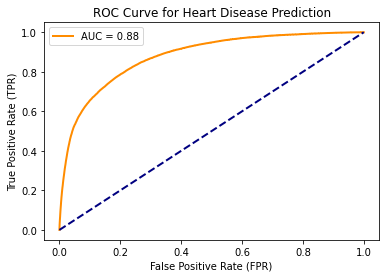

Area under curve (AUC):0.8776679793732526



In [6]:
from sklearn.metrics import roc_curve, roc_auc_score

# getting probabiistic  predictions

Xtest_withconstant = sm.add_constant(X_test)

model_predictions_prob_train = logreg_results.predict(X_withconstant)
model_predictions_prob_test = logreg_results.predict(Xtest_withconstant)

fprs, tprs, thresholds = roc_curve(y_test, model_predictions_prob_test)
roc_auc = roc_auc_score(y_test, model_predictions_prob_test)

plt.figure()
plt.plot(fprs, tprs, color='darkorange',
         lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Heart Disease Prediction')
plt.legend(loc="best")
plt.show()

print(f'Area under curve (AUC):{roc_auc}')
print()

In [7]:
# Specify the desired FPR 
desired_fpr = 0.2

# Find the index of the point on the ROC curve closest to the desired FPR or TPR
index_at_desired_fpr = np.argmin(np.abs(fprs - desired_fpr))

# Get the corresponding threshold values
threshold_at_desired_fpr = thresholds[index_at_desired_fpr]
tpr_at_desired_fpr = tprs[index_at_desired_fpr]


print(f"Threshold at desired FPR ({desired_fpr}): {threshold_at_desired_fpr}")
print(f"TPR at desired FPR ({desired_fpr}): {tpr_at_desired_fpr}")

Threshold at desired FPR (0.2): 0.44671120520276925
TPR at desired FPR (0.2): 0.7863800042363907


## Testing to determine if the above model violates the most critical assumption of a logistic regression

Assumption: The relationship between the logit(log-odds) of the outcome and each continuous independent variable is linear

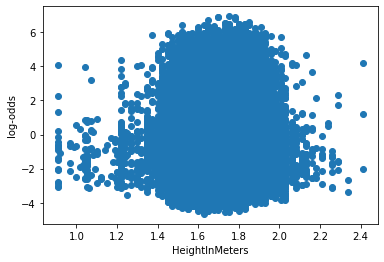

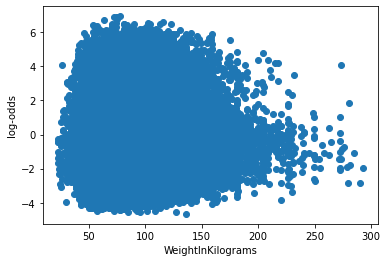

In [8]:
#Defining the continuous independent variables and making predictions on the test set

cont_vars = ['HeightInMeters','WeightInKilograms']

predicted = logreg_results.predict(Xtest_withconstant)


#Getting log odds values
log_odds = np.log(predicted/(1-predicted))


#Visualizing the predictor variables vs logit values 
for var in cont_vars:
    plt.scatter(x=Xtest_withconstant[var], y=log_odds)
    plt.xlabel(f'{var}')
    plt.ylabel('log-odds')
    plt.show()

The model does violate the most critical assumption of a logistic regression so the model coeficients need to be taken with a grain of salt.

### Applying Regularization With the Logistic Regression Model:

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
#from sklearn.metrics import make_scorer, f1_score


estimators = [('normalise', StandardScaler()),
              ('logit',LogisticRegression())]
pipe = Pipeline(estimators)

params = {'logit__C': [0.0001,0.001,0.01,0.1,1,10],
         'logit__penalty': ['l2']}

#f1_scorer = make_scorer(f1_score)

grid_search = GridSearchCV(pipe, param_grid=params, scoring='roc_auc')

fitted_search = grid_search.fit(X_train_bal, y_train_bal)

auc_trainscore = fitted_search.best_score_
print(f"AUC score on the train set: {auc_trainscore}")

AUC score on the train set: 0.878852807321695


In [10]:
fitted_search.best_estimator_

Pipeline(steps=[('normalise', StandardScaler()),
                ('logit', LogisticRegression(C=0.01))])

## Logistic Regression Model Evaluation after Regularization

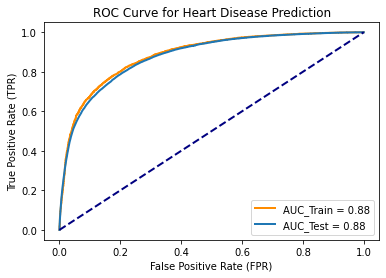

AUC_Train:0.8847326988240232
AUC_Test:0.8780317920703746


In [11]:
bestlog_model = fitted_search.best_estimator_

y_proba_train = bestlog_model.predict_proba(X_train_bal)[:,1]
y_proba_test = bestlog_model.predict_proba(X_test)[:,1]

fprs_train, tprs_train, thresholds_train = roc_curve(y_train_bal, y_proba_train)
fprs_test, tprs_test, thresholds_test = roc_curve(y_test, y_proba_test)
roc_auc_train = roc_auc_score(y_train_bal, y_proba_train)
roc_auc_test = roc_auc_score(y_test, y_proba_test)

plt.figure()
plt.plot(fprs_train, tprs_train, color='darkorange',
         lw=2, label='AUC_Train = %0.2f' % roc_auc_train)
plt.plot(fprs_test, tprs_test, lw=2, label='AUC_Test = %0.2f' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Heart Disease Prediction')
plt.legend(loc="best")
plt.show()

print(f'AUC_Train:{roc_auc_train}')
print(f'AUC_Test:{roc_auc_test}')

With a Test AUC Score of 0.88, the model doesn't improve after regularization. However it is doing well in distinguishing between individuals who have had a heart attack and individuals who haven't.

## Using a Decision Tree Classifier

In [12]:
from sklearn.tree import DecisionTreeClassifier
from tempfile import mkdtemp
cachedir = mkdtemp()

estimators = [('dt', DecisionTreeClassifier())]

pipe = Pipeline(estimators, memory = cachedir)

params = {'dt__max_depth': [1,2,5,7,10,20],
         'dt__min_samples_split': [2,4,7,11,20]}

grid_search = GridSearchCV(pipe, param_grid=params, scoring='roc_auc')

fitted_search_dt = grid_search.fit(X_train_bal, y_train_bal)

#Evaluating on the AUC score
auc_trainscore = fitted_search_dt.best_score_
print(f"AUC score on the train set: {auc_trainscore}")

AUC score on the train set: 0.8563540302819511


In [13]:
fitted_search_dt.best_estimator_

Pipeline(memory='C:\\Users\\ROLAND~1.TET\\AppData\\Local\\Temp\\tmponw9x8n2',
         steps=[('dt',
                 DecisionTreeClassifier(max_depth=7, min_samples_split=20))])

The best model uses a maximum depth of 7 and a minimum samples split of 20

## Model Evaluation 

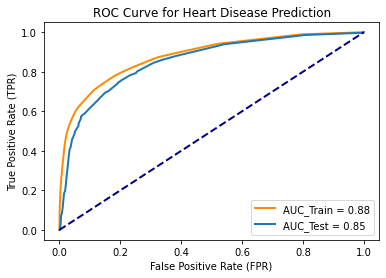

AUC_Train:0.8799518206536106
AUC_Test:0.853198859150594


In [14]:
bestdt_model = fitted_search_dt.best_estimator_

y_proba_train = bestdt_model.predict_proba(X_train_bal)[:,1]
y_proba_test = bestdt_model.predict_proba(X_test)[:,1]

fprs_train, tprs_train, thresholds_train = roc_curve(y_train_bal, y_proba_train)
fprs_test, tprs_test, thresholds_test = roc_curve(y_test, y_proba_test)
roc_auc_train = roc_auc_score(y_train_bal, y_proba_train)
roc_auc_test = roc_auc_score(y_test, y_proba_test)

plt.figure()
plt.plot(fprs_train, tprs_train, color='darkorange',
         lw=2, label='AUC_Train = %0.2f' % roc_auc_train)
plt.plot(fprs_test, tprs_test, lw=2, label='AUC_Test = %0.2f' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Heart Disease Prediction')
plt.legend(loc="best")
plt.show()

print(f'AUC_Train:{roc_auc_train}')
print(f'AUC_Test:{roc_auc_test}')

With a Test AUC Score of 0.85, it is doing well in distinguishing between individuals who have had a heart attack and individuals who haven't.

In [15]:
# Specify the desired FPR 
desired_fpr = 0.2

# Find the index of the point on the ROC curve closest to the desired FPR or TPR
index_at_desired_fpr = np.argmin(np.abs(fprs_test - desired_fpr))

# Get the corresponding threshold values
threshold_at_desired_fpr = thresholds_test[index_at_desired_fpr]
tpr_at_desired_fpr = tprs_test[index_at_desired_fpr]


print(f"Threshold at desired FPR ({desired_fpr}): {threshold_at_desired_fpr}")
print(f"TPR at desired FPR ({desired_fpr}): {tpr_at_desired_fpr}")

Threshold at desired FPR (0.2): 0.48125
TPR at desired FPR (0.2): 0.7589493751323872


## Using a Support Vector Machines Model

In [16]:
#With a range of c values and using a linear kernel

from sklearn.svm import SVC


estimators = [('normalise', StandardScaler()),
              ('linearsvm', SVC())]
pipe = Pipeline(estimators, memory = cachedir)

params = {'linearsvm__C': [0.0001,0.001,0.01,0.1,1,10],
         'linearsvm__kernel': ['linear'],
         'linearsvm__probability': [True]}


grid_search = GridSearchCV(pipe, param_grid=params, scoring='roc_auc', verbose=5)

fitted_search_svm = grid_search.fit(X_train_bal, y_train_bal)

#Evaluating on the AUC score
auc_trainscore = fitted_search_svm.best_score_
print(f"AUC score on the train set: {auc_trainscore}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END linearsvm__C=0.0001, linearsvm__kernel=linear, linearsvm__probability=True; total time=  26.1s
[CV 2/5] END linearsvm__C=0.0001, linearsvm__kernel=linear, linearsvm__probability=True; total time=  25.6s
[CV 3/5] END linearsvm__C=0.0001, linearsvm__kernel=linear, linearsvm__probability=True; total time=  28.2s
[CV 4/5] END linearsvm__C=0.0001, linearsvm__kernel=linear, linearsvm__probability=True; total time=  25.5s
[CV 5/5] END linearsvm__C=0.0001, linearsvm__kernel=linear, linearsvm__probability=True; total time=  27.8s
[CV 1/5] END linearsvm__C=0.001, linearsvm__kernel=linear, linearsvm__probability=True; total time=  20.7s
[CV 2/5] END linearsvm__C=0.001, linearsvm__kernel=linear, linearsvm__probability=True; total time=  21.6s
[CV 3/5] END linearsvm__C=0.001, linearsvm__kernel=linear, linearsvm__probability=True; total time=  25.1s
[CV 4/5] END linearsvm__C=0.001, linearsvm__kernel=linear, linearsvm__probabili

In [17]:
fitted_search_svm.best_estimator_

Pipeline(memory='C:\\Users\\ROLAND~1.TET\\AppData\\Local\\Temp\\tmponw9x8n2',
         steps=[('normalise', StandardScaler()),
                ('linearsvm', SVC(C=0.001, kernel='linear', probability=True))])

## Model Evaluation 

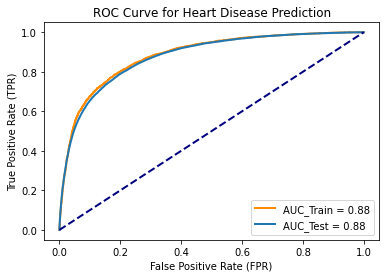

AUC_Train:0.8821563255843539
AUC_Test:0.8766474956406813


In [18]:
bestmodel_svm = fitted_search_svm.best_estimator_

y_proba_train = bestmodel_svm.predict_proba(X_train_bal)[:,1]
y_proba_test = bestmodel_svm.predict_proba(X_test)[:,1]

fprs_train, tprs_train, thresholds_train = roc_curve(y_train_bal, y_proba_train)
fprs_test, tprs_test, thresholds_test = roc_curve(y_test, y_proba_test)
roc_auc_train = roc_auc_score(y_train_bal, y_proba_train)
roc_auc_test = roc_auc_score(y_test, y_proba_test)

plt.figure()
plt.plot(fprs_train, tprs_train, color='darkorange',
         lw=2, label='AUC_Train = %0.2f' % roc_auc_train)
plt.plot(fprs_test, tprs_test, lw=2, label='AUC_Test = %0.2f' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Heart Disease Prediction')
plt.legend(loc="best")
plt.show()

print(f'AUC_Train:{roc_auc_train}')
print(f'AUC_Test:{roc_auc_test}')

With a Test AUC Score of 0.88, it is doing well in distinguishing between individuals who have had a heart attack and individuals who haven't.

In [19]:
# Specify the desired FPR 
desired_fpr = 0.2

# Find the index of the point on the ROC curve closest to the desired FPR or TPR
index_at_desired_fpr = np.argmin(np.abs(fprs_test - desired_fpr))

# Get the corresponding threshold values
threshold_at_desired_fpr = thresholds_test[index_at_desired_fpr]
tpr_at_desired_fpr = tprs_test[index_at_desired_fpr]


print(f"Threshold at desired FPR ({desired_fpr}): {threshold_at_desired_fpr}")
print(f"TPR at desired FPR ({desired_fpr}): {tpr_at_desired_fpr}")

Threshold at desired FPR (0.2): 0.43180679432689667
TPR at desired FPR (0.2): 0.789133658123279


## Using a Random Forest Classifier

In [20]:

from sklearn.ensemble import RandomForestClassifier


estimators = [('normalise', StandardScaler()),
              ('rfc', RandomForestClassifier())]

pipe = Pipeline(estimators, memory = cachedir)

params = {'rfc__n_estimators': [10,20,30],
         'rfc__max_depth': [1,2,5,7,10,20,30],
         'rfc__min_samples_split': [2,4,7,11,20]}


grid_search = GridSearchCV(pipe, param_grid=params, scoring='roc_auc')

fitted_search_rfc = grid_search.fit(X_train_bal, y_train_bal)

#Evaluating on the AUC score
auc_trainscore = fitted_search_rfc.best_score_
print(f"AUC score on the train set: {auc_trainscore}")

AUC score on the train set: 0.8782486328531887


In [21]:
fitted_search_rfc.best_estimator_

Pipeline(memory='C:\\Users\\ROLAND~1.TET\\AppData\\Local\\Temp\\tmponw9x8n2',
         steps=[('normalise', StandardScaler()),
                ('rfc',
                 RandomForestClassifier(max_depth=20, min_samples_split=20,
                                        n_estimators=30))])

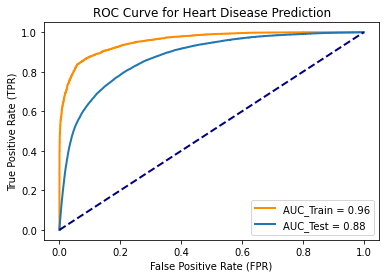

AUC_Train:0.9573941736441075
AUC_Test:0.8753437780147151


In [22]:
bestrfc_model = fitted_search_rfc.best_estimator_

y_proba_train = bestrfc_model.predict_proba(X_train_bal)[:,1]
y_proba_test = bestrfc_model.predict_proba(X_test)[:,1]

fprs_train, tprs_train, thresholds_train = roc_curve(y_train_bal, y_proba_train)
fprs_test, tprs_test, thresholds_test = roc_curve(y_test, y_proba_test)
roc_auc_train = roc_auc_score(y_train_bal, y_proba_train)
roc_auc_test = roc_auc_score(y_test, y_proba_test)

plt.figure()
plt.plot(fprs_train, tprs_train, color='darkorange',
         lw=2, label='AUC_Train = %0.2f' % roc_auc_train)
plt.plot(fprs_test, tprs_test, lw=2, label='AUC_Test = %0.2f' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Heart Disease Prediction')
plt.legend(loc="best")
plt.show()

print(f'AUC_Train:{roc_auc_train}')
print(f'AUC_Test:{roc_auc_test}')

With a Test AUC Score of 0.88, it is doing well in distinguishing between individuals who have had a heart attack and individuals who haven't.

In [23]:
# Specify the desired FPR 
desired_fpr = 0.2

# Find the index of the point on the ROC curve closest to the desired FPR or TPR
index_at_desired_fpr = np.argmin(np.abs(fprs_test - desired_fpr))

# Get the corresponding threshold values
threshold_at_desired_fpr = thresholds_test[index_at_desired_fpr]
tpr_at_desired_fpr = tprs_test[index_at_desired_fpr]


print(f"Threshold at desired FPR ({desired_fpr}): {threshold_at_desired_fpr}")
print(f"TPR at desired FPR ({desired_fpr}): {tpr_at_desired_fpr}")

Threshold at desired FPR (0.2): 0.521969290763284
TPR at desired FPR (0.2): 0.7839440796441431


Next Steps, applying ensemble learning methods based on the best models derived from this step.